# Moscot maps to cell type transitions

This sums over the corresponding rows/columns of moscots transport maps to compute transition rates between cell types

In [ ]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sc.settings.verbosity = 0

In [ ]:
import sys,os
sys.path.append('/home/icb/manuel.gander/mouse_atlas/notebook')
import c2

In [ ]:
Path="/home/mgander/mouse_atlas/data"
#Path="/home/icb/manuel.gander/mouse_atlas/data"
ts=['E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25', 'E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25', 'E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5', 'E13.5']

## Anchor-based batch integrated

In [26]:
eps=0.005
rank=-1
cutoff=0.05

frames=[]
for i in range(19):
#for i in [17]:
    ts0=ts[i]
    ts1=ts[i+1]
    print(f'{ts0}_{ts1}')
    #adata=sc.read(f"{Path}/Comb_anndatas/adata_{ts0}_{ts1}.h5ad")

    CT0=pd.read_pickle(f'{Path}/moscot_maps/Anchors/CTs/{ts0}_{ts1}_cell_type_transitions.pkl')
    CT1=pd.read_csv(f'{Path}/TOME_maps/Anchors/TOME_map_{ts0}_{ts1}.csv')
    CT1.index=list(CT1['Unnamed: 0'])
    del CT1['Unnamed: 0']
    CT1=CT1.T.copy()
    
    df0=c2.evaluate_using_curated_transitions0(G, CT0, cutoff)
    df0['Method']='moscot'
    df1=c2.evaluate_using_curated_transitions0(G, CT1, cutoff)
    df1['Method']='TOME'
    dfc=pd.concat([df0,df1], ignore_index=True)
    dfc['timepair']=ts0+'_'+ts1
    dfc['eps']=eps
    
    frames.append(dfc)
df=pd.concat(frames, ignore_index=True)

df_Anchors=df.copy()
df_Anchors['Method']=[a+'_Anchors' for a in df_Anchors['Method']]

E3.5_E4.5
E4.5_E5.25
E5.25_E5.5
E5.5_E6.25
E6.25_E6.5
E6.5_E6.75
E6.75_E7.0
E7.0_E7.25
E7.25_E7.5
E7.5_E7.75
E7.75_E8.0
E8.0_E8.25
E8.25_E8.5a
E8.5a_E8.5b
E8.5b_E9.5
E9.5_E10.5
E10.5_E11.5
E11.5_E12.5
E12.5_E13.5


(0.0, 1.01)

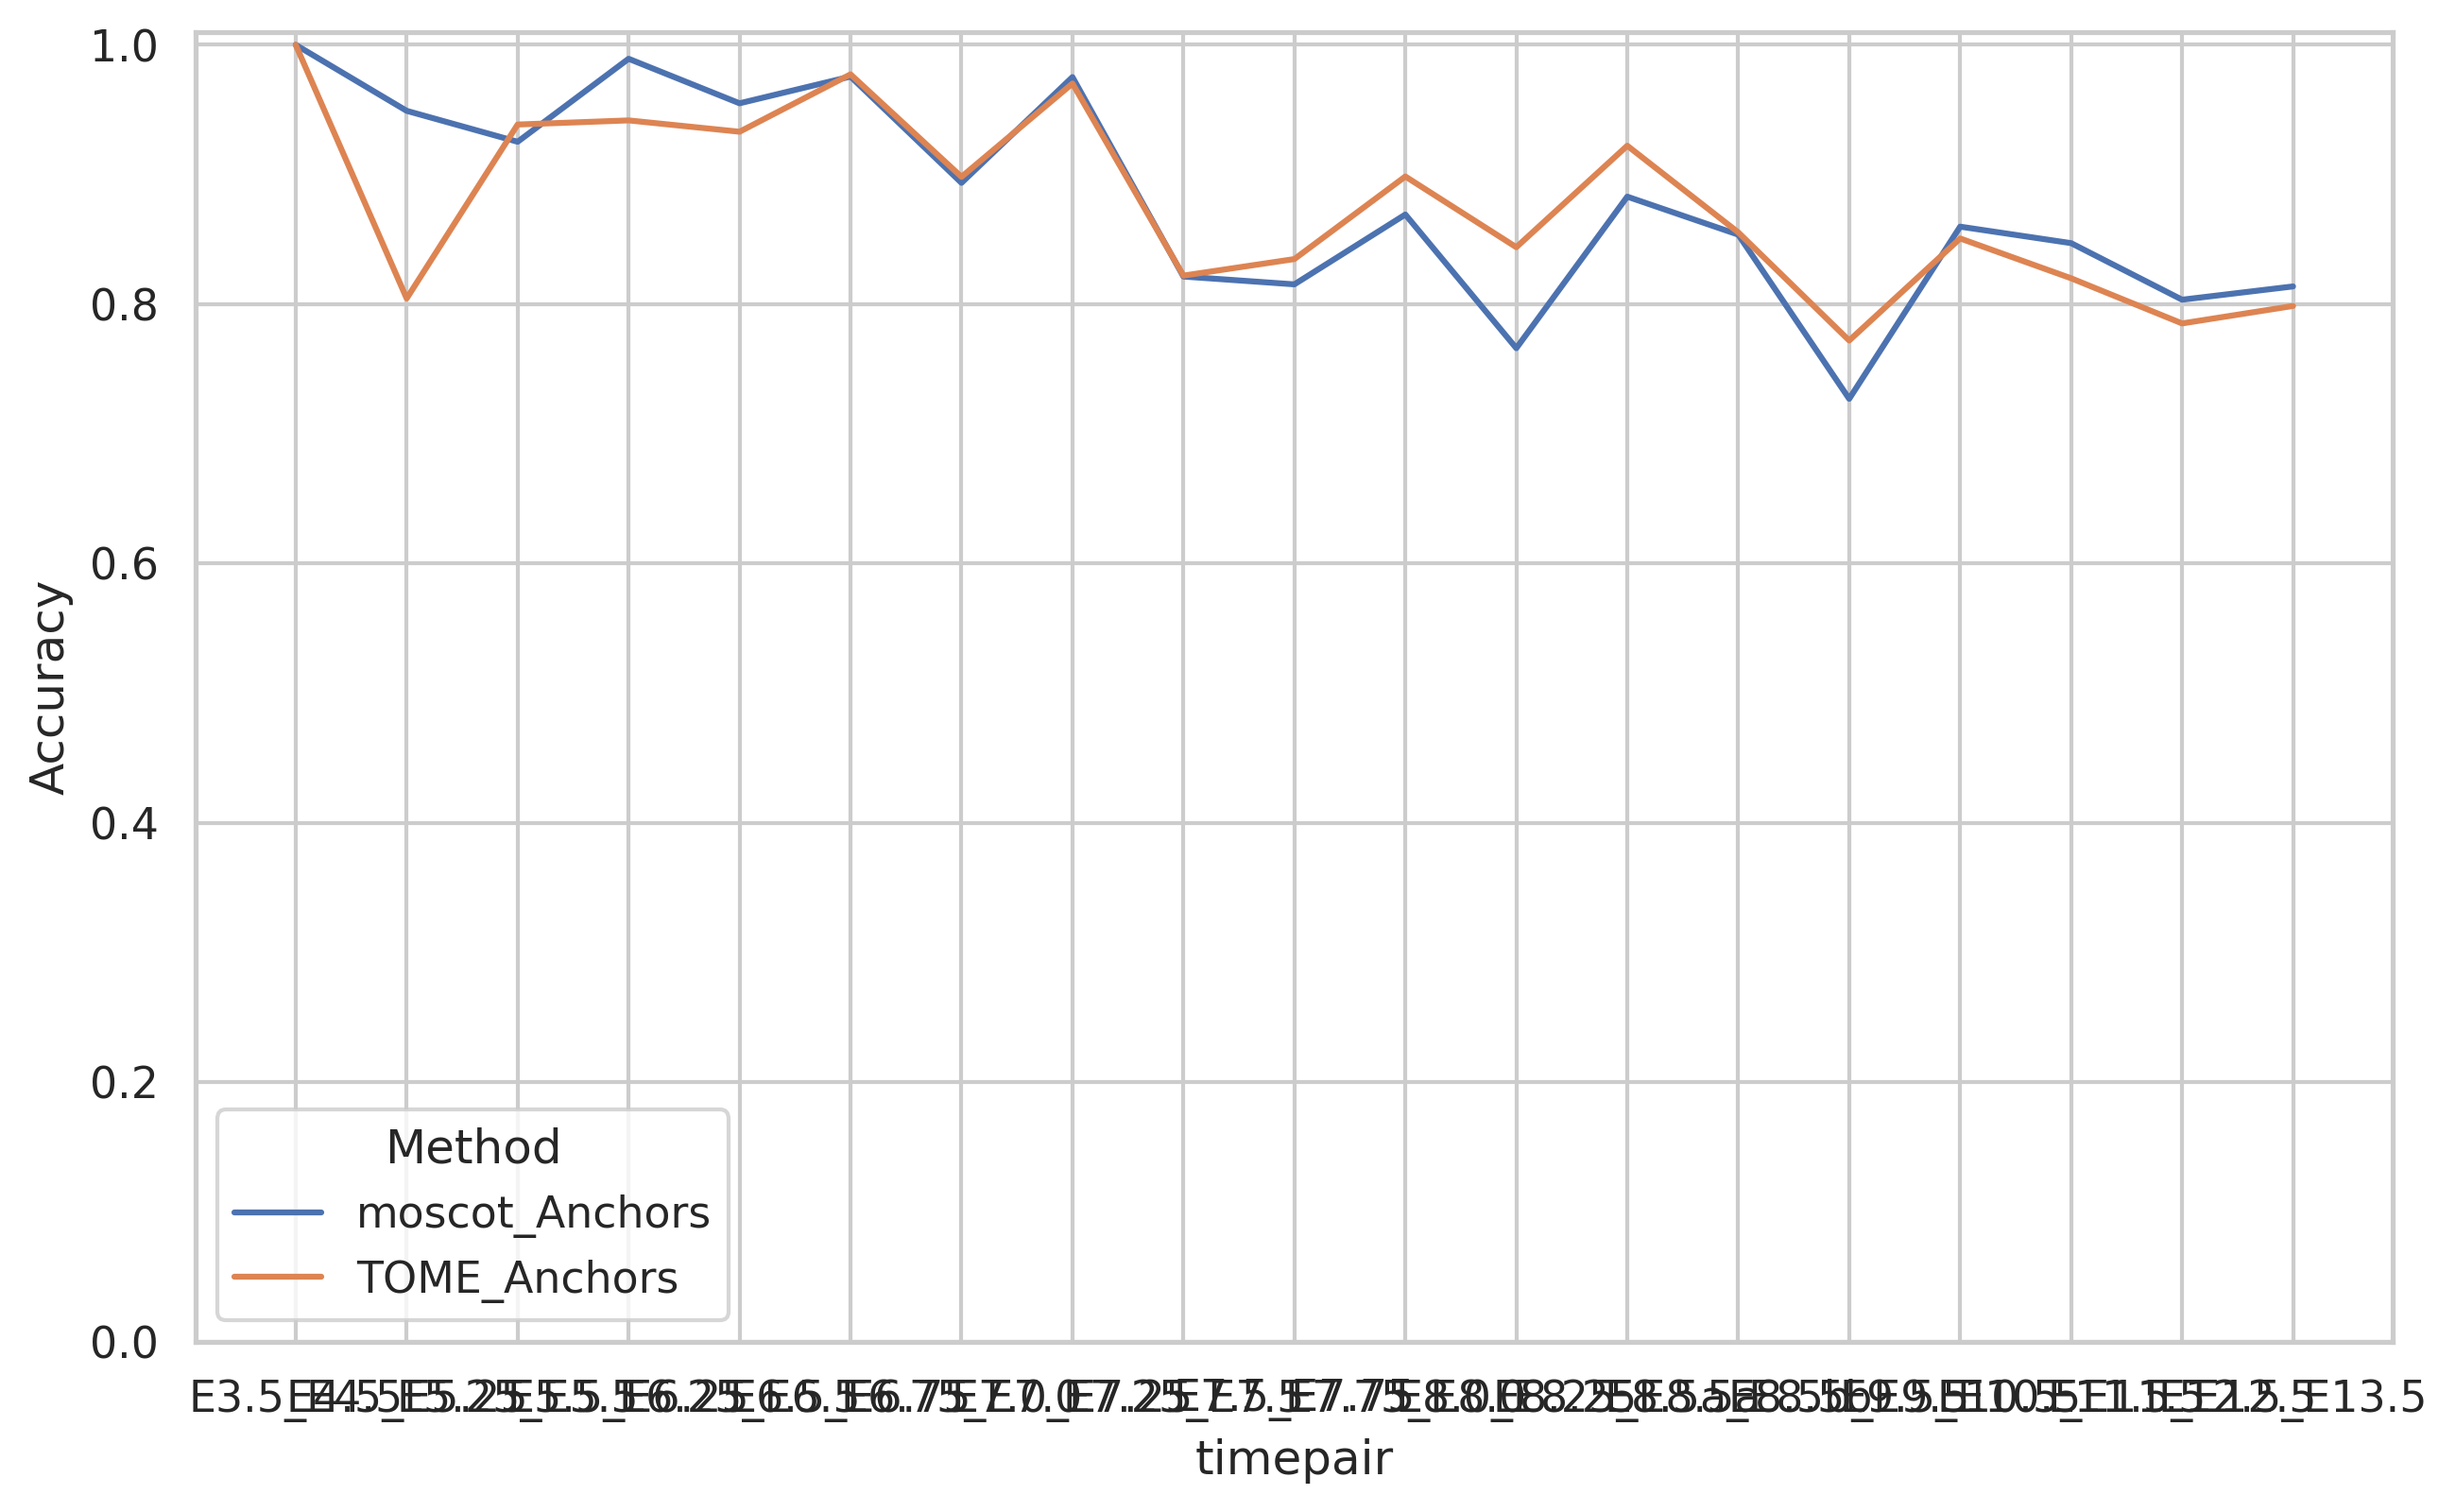

In [27]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('whitegrid')
sns.lineplot(data=df_Anchors, x='timepair', y='Accuracy', hue='Method')
plt.ylim(0,1.01)

## Standart PCA

In [28]:
eps=0.005
rank=-1
cutoff=0.05

frames=[]
for i in range(19):
    ts0=ts[i]
    ts1=ts[i+1]
    print(f'{ts0}_{ts1}')
        
    CT0=pd.read_pickle(f'{Path}/moscot_maps/PCA/CTs/{ts0}_{ts1}_cell_type_transitions.pkl')
    CT1=pd.read_csv(f'{Path}/TOME_maps/PCA/TOME_map_{ts0}_{ts1}.csv')
    CT1.index=list(CT1['Unnamed: 0'])
    del CT1['Unnamed: 0']
    CT1=CT1.T.copy()
    
    
    df0=c2.evaluate_using_curated_transitions0(G, CT0, cutoff)
    df0['Method']='moscot'
    df1=c2.evaluate_using_curated_transitions0(G, CT1, cutoff)
    df1['Method']='TOME'
    dfc=pd.concat([df0,df1], ignore_index=True)
    dfc['timepair']=ts0+'_'+ts1
    dfc['eps']=eps
    
    frames.append(dfc)
df=pd.concat(frames, ignore_index=True)

df_PCA=df.copy()
df_PCA['Method']=[a+'_PCA' for a in df_PCA['Method']]

E3.5_E4.5
E4.5_E5.25
E5.25_E5.5
E5.5_E6.25
E6.25_E6.5
E6.5_E6.75
E6.75_E7.0
E7.0_E7.25
E7.25_E7.5
E7.5_E7.75
E7.75_E8.0
E8.0_E8.25
E8.25_E8.5a
E8.5a_E8.5b
E8.5b_E9.5
E9.5_E10.5
E10.5_E11.5
E11.5_E12.5
E12.5_E13.5


(0.0, 1.01)

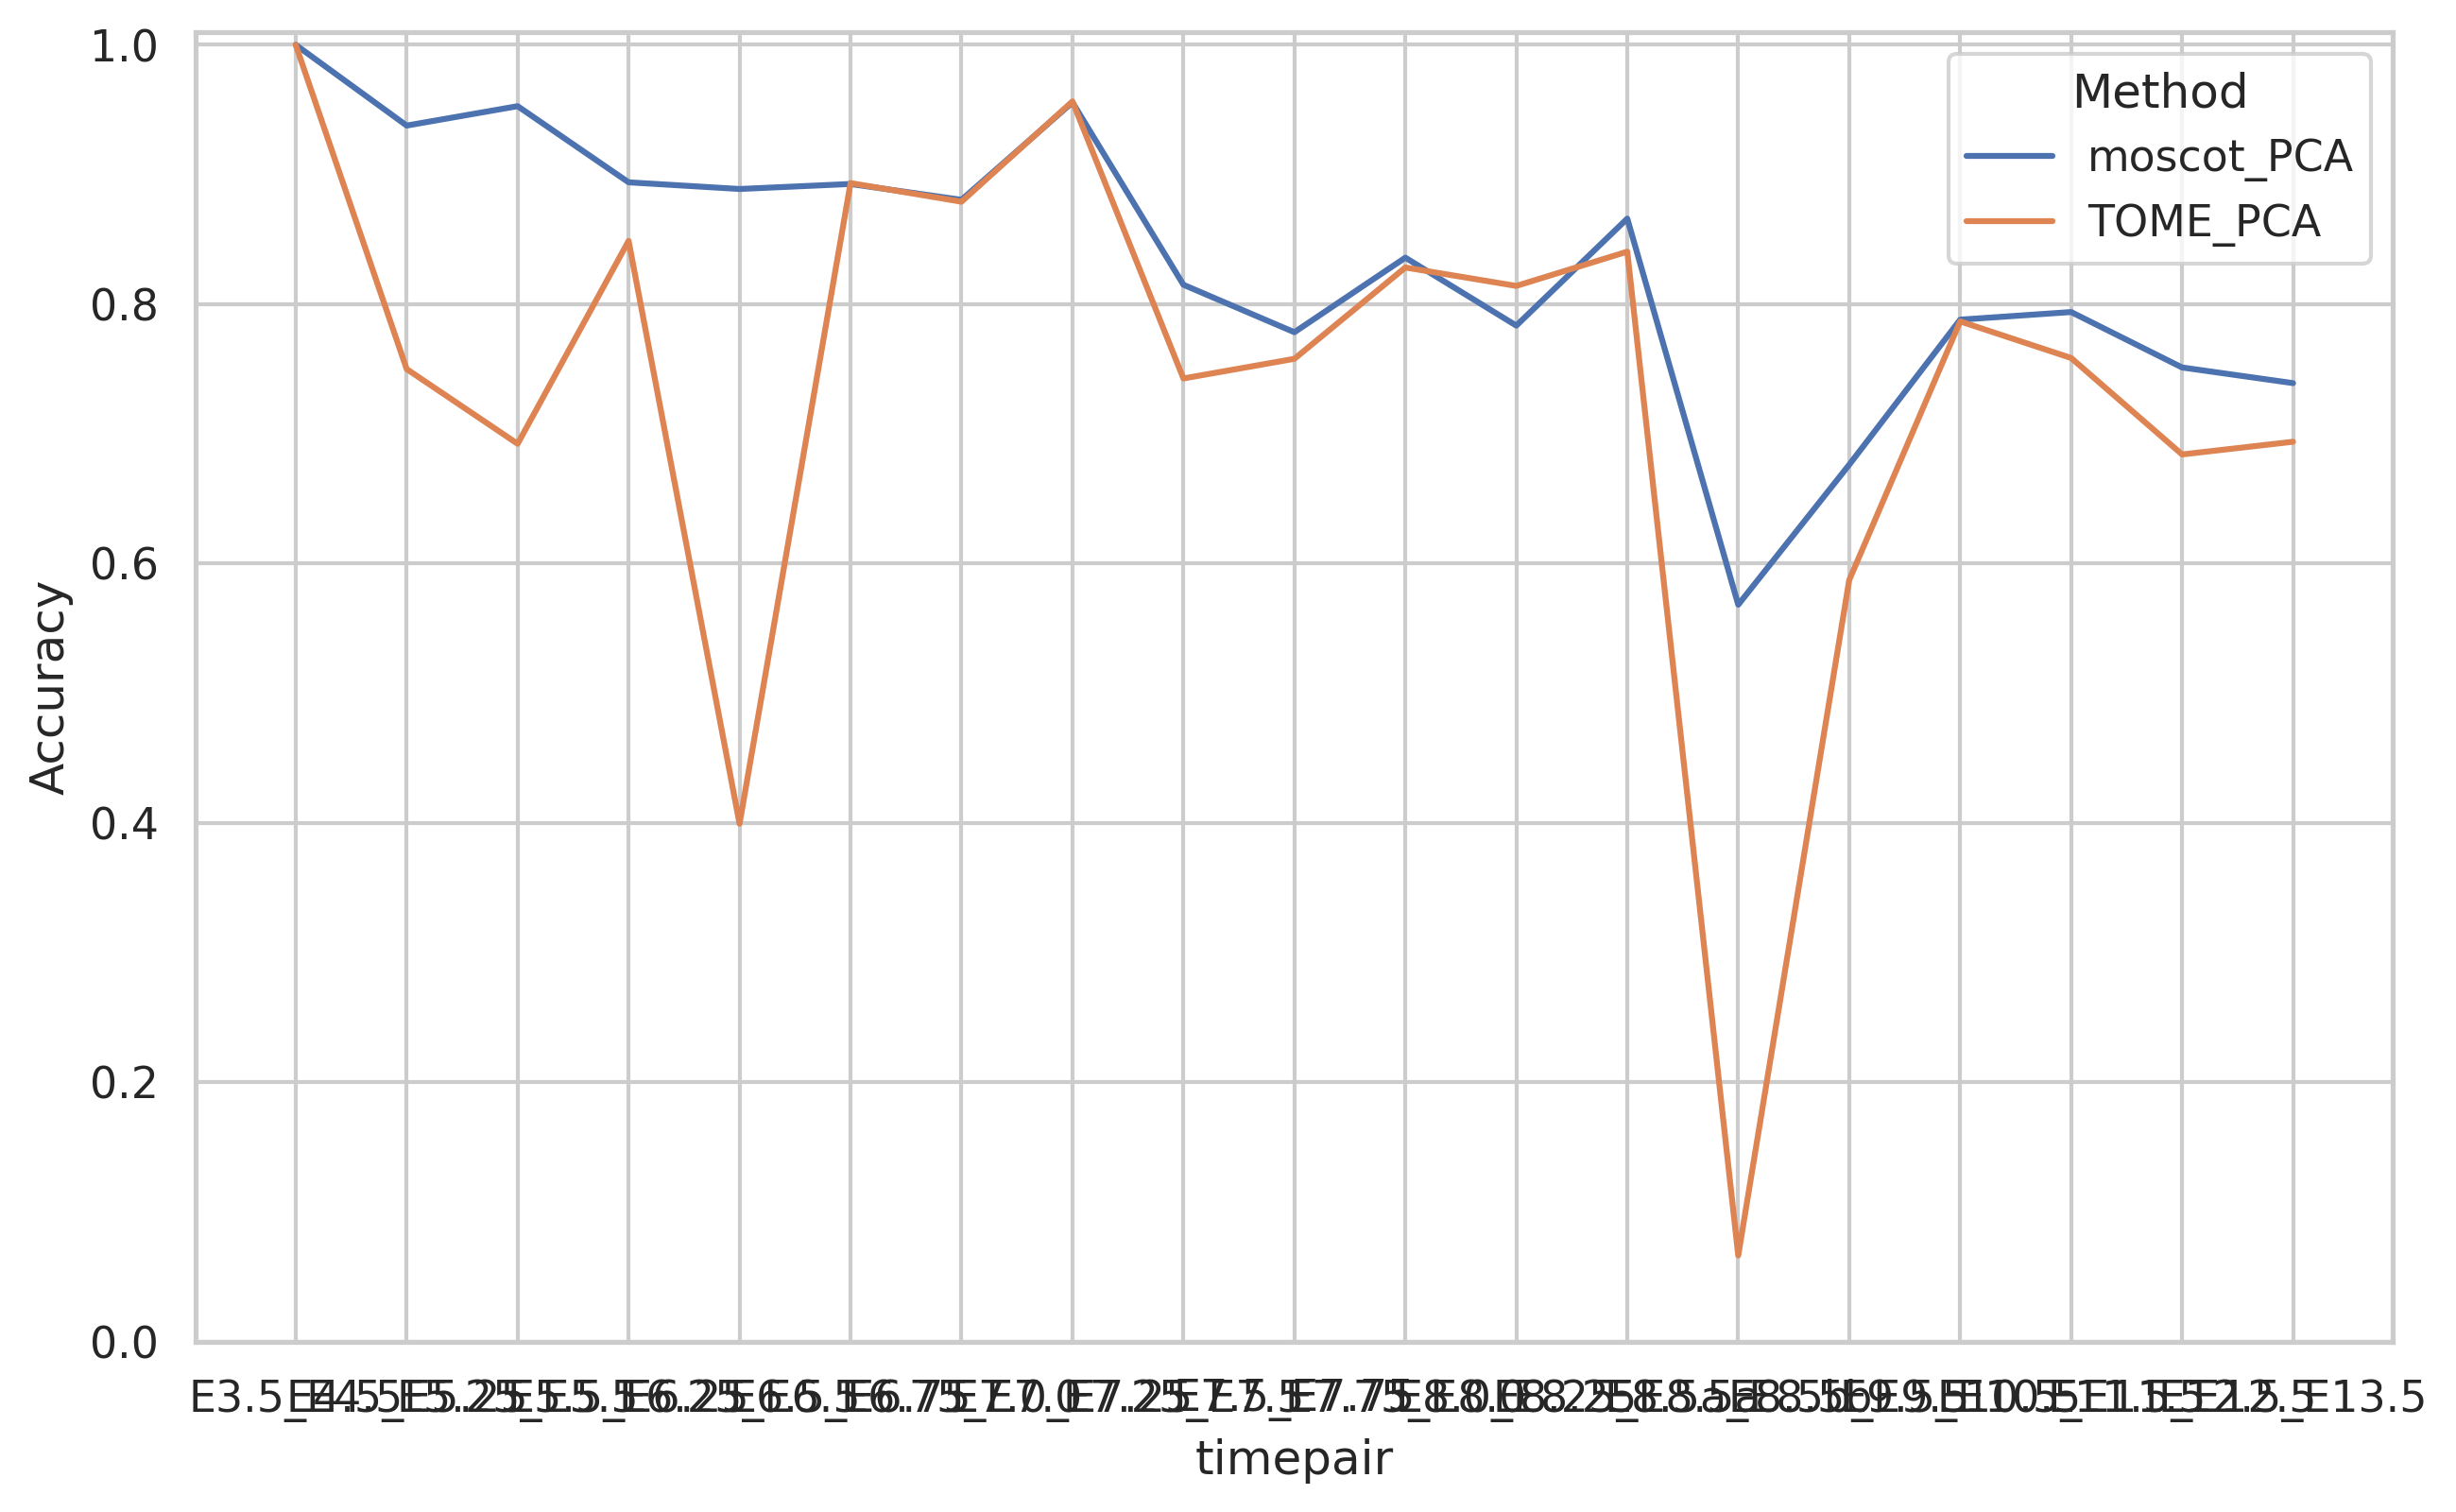

In [29]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('whitegrid')
sns.lineplot(data=df_PCA, x='timepair', y='Accuracy', hue='Method')
plt.ylim(0,1.01)

## scVI

In [30]:
eps=0.005
rank=-1
cutoff=0.05

frames=[]
for i in range(19):
    ts0=ts[i]
    ts1=ts[i+1]
    print(f'{ts0}_{ts1}')

    CT0=pd.read_pickle(f'{Path}/moscot_maps/scVI/CTs/{ts0}_{ts1}_cell_type_transitions.pkl')
    CT1=pd.read_csv(f'{Path}/TOME_maps/scVI/TOME_map_{ts0}_{ts1}.csv')
    CT1.index=list(CT1['Unnamed: 0'])
    del CT1['Unnamed: 0']
    CT1=CT1.T.copy()
    
    
    df0=c2.evaluate_using_curated_transitions0(G, CT0, cutoff)
    df0['Method']='moscot'
    df1=c2.evaluate_using_curated_transitions0(G, CT1, cutoff)
    df1['Method']='TOME'
    dfc=pd.concat([df0,df1], ignore_index=True)
    dfc['timepair']=ts0+'_'+ts1
    dfc['eps']=eps
    
    frames.append(dfc)
df=pd.concat(frames, ignore_index=True)

df_scVI=df.copy()
df_scVI['Method']=[a+'_scVI' for a in df_scVI['Method']]

E3.5_E4.5
E4.5_E5.25
E5.25_E5.5
E5.5_E6.25
E6.25_E6.5
E6.5_E6.75
E6.75_E7.0
E7.0_E7.25
E7.25_E7.5
E7.5_E7.75
E7.75_E8.0
E8.0_E8.25
E8.25_E8.5a
E8.5a_E8.5b
E8.5b_E9.5
E9.5_E10.5
E10.5_E11.5
E11.5_E12.5
E12.5_E13.5


(0.0, 1.01)

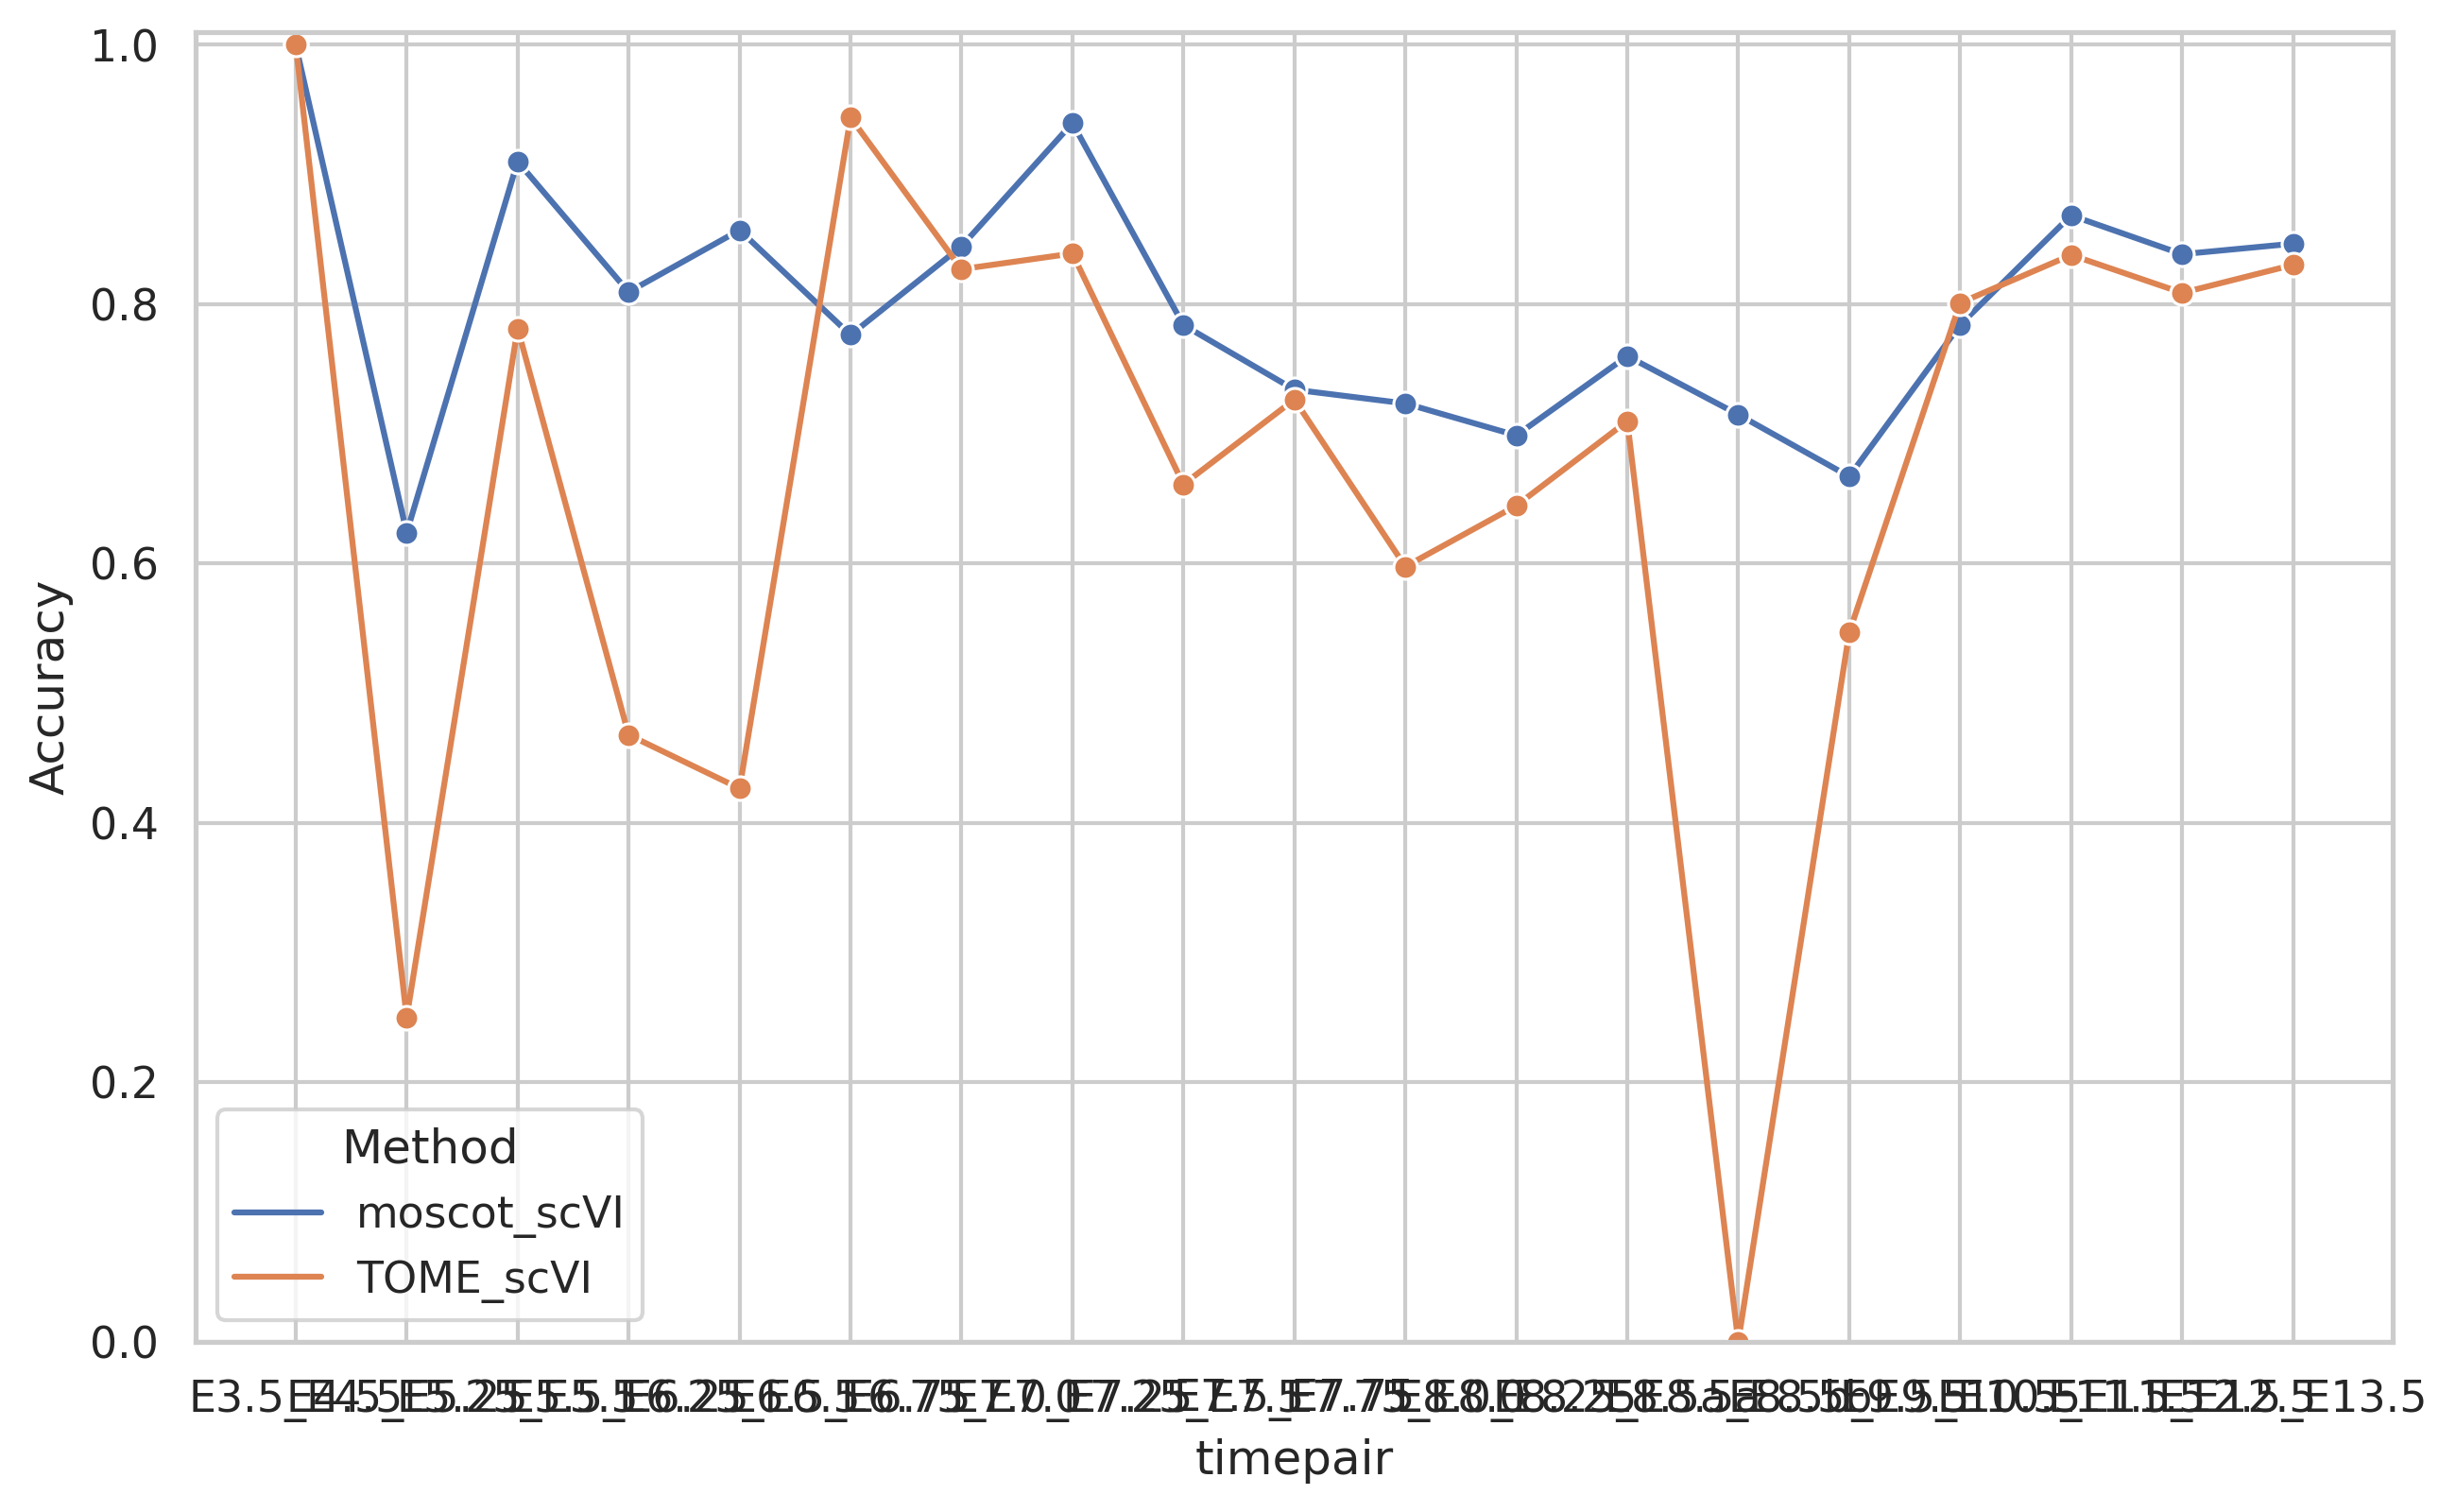

In [31]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('whitegrid')
sns.lineplot(data=df_scVI, x='timepair', y='Accuracy', hue='Method', marker='o')
plt.ylim(0,1.01)

# Combine all

In [32]:
df=pd.concat([df_Anchors, df_PCA, df_scVI], ignore_index=True)
df['Starting time point']=[a.split('_')[0] for a in df['timepair']]

(0.0, 1.01)

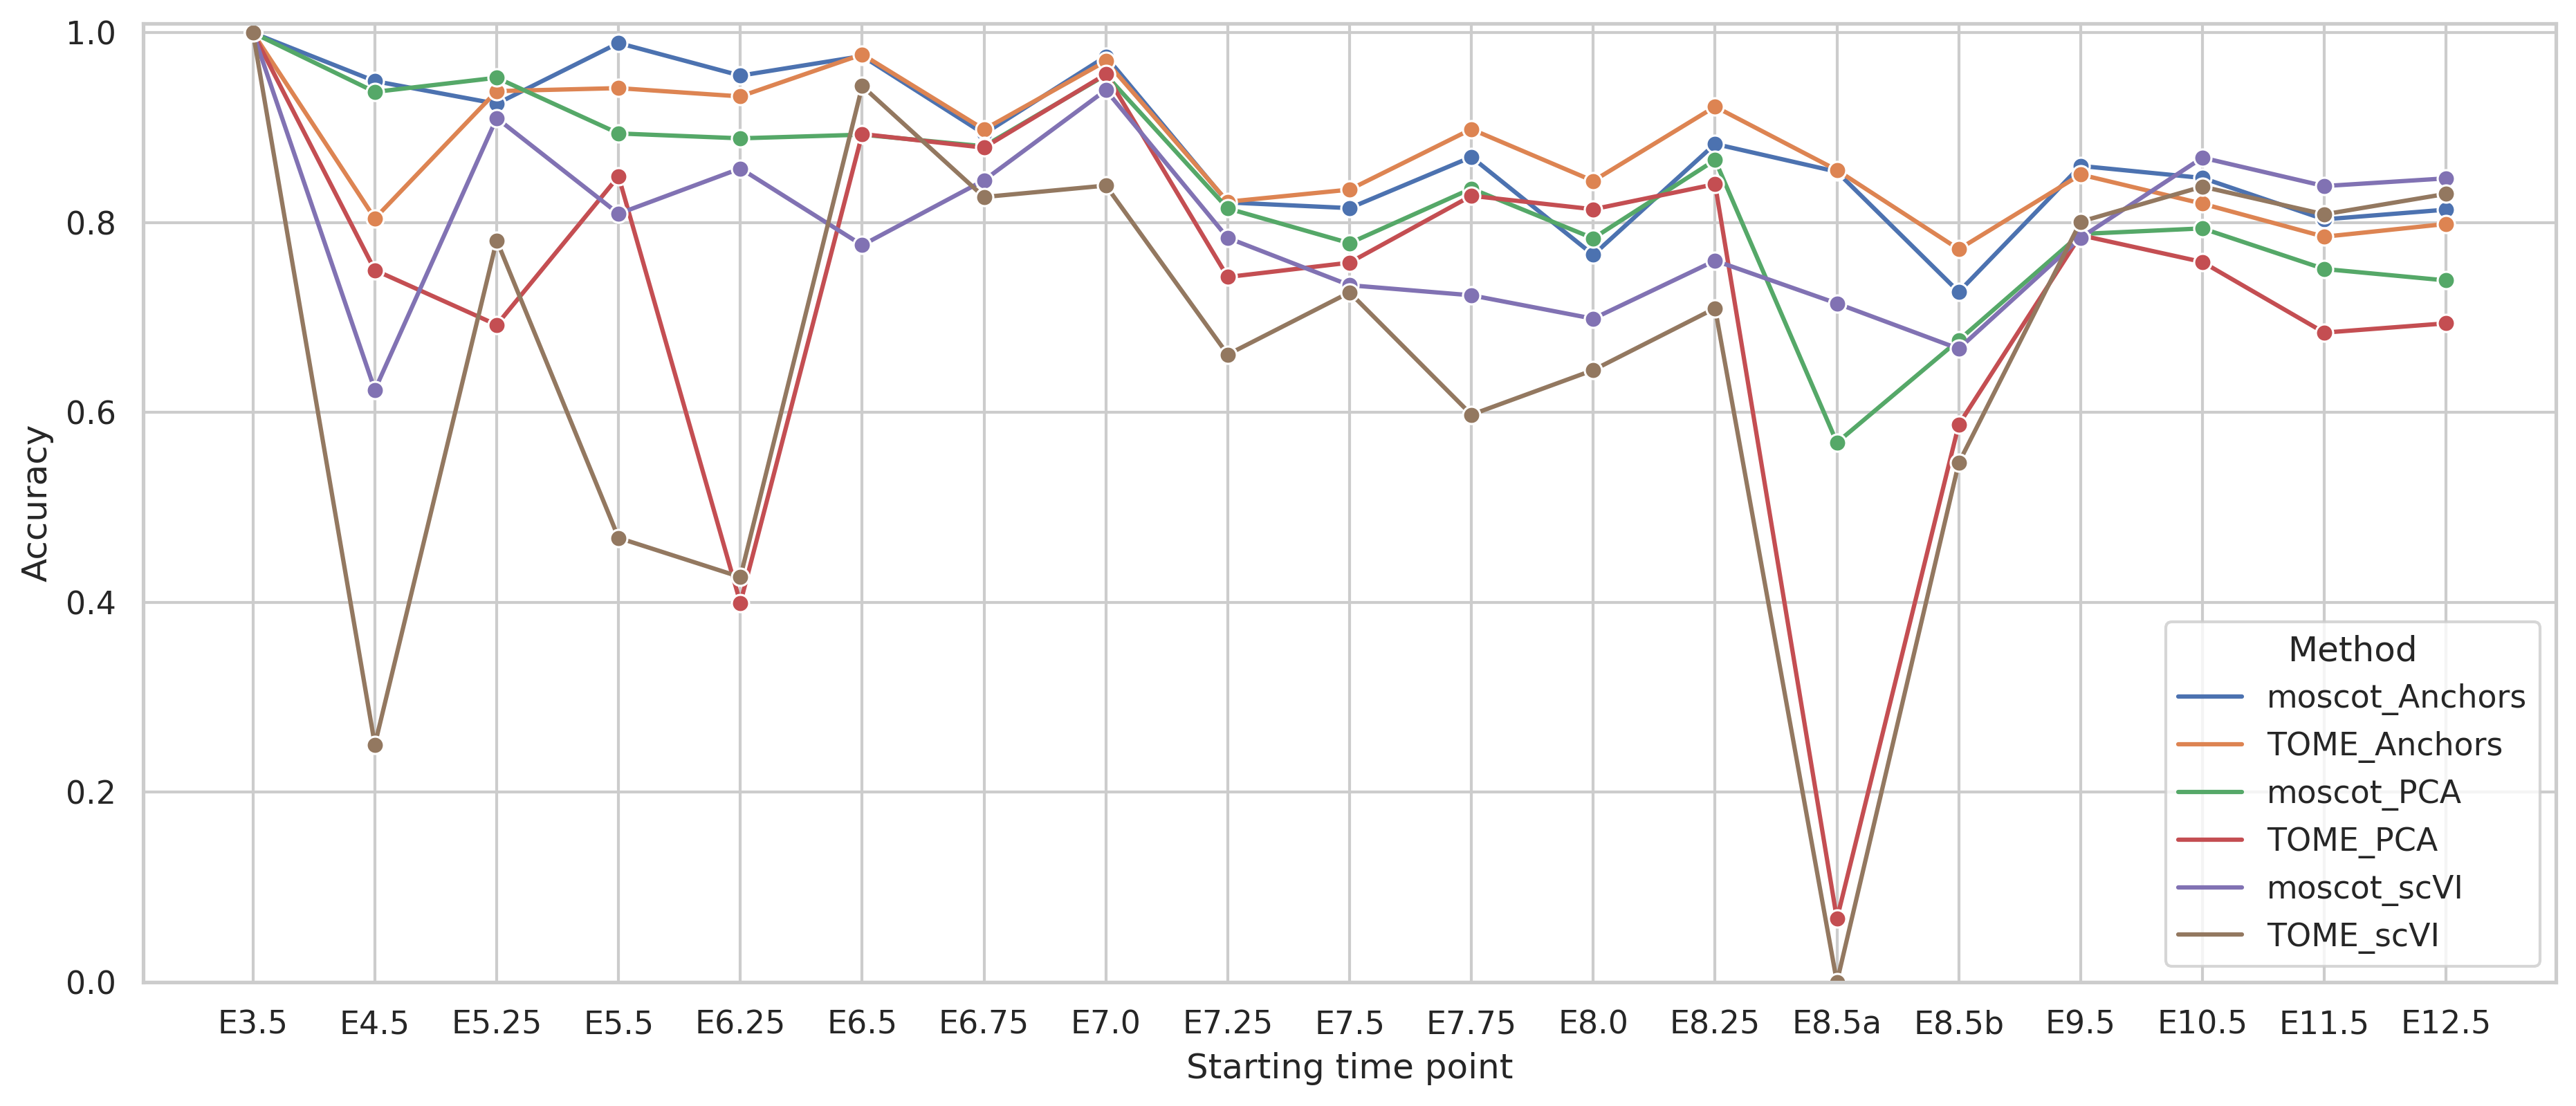

In [33]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,6)})
sns.set_style('whitegrid')
sns.lineplot(data=df, x='Starting time point', y='Accuracy', hue='Method', marker='o')
plt.ylim(0,1.01)

(0.0, 1.01)

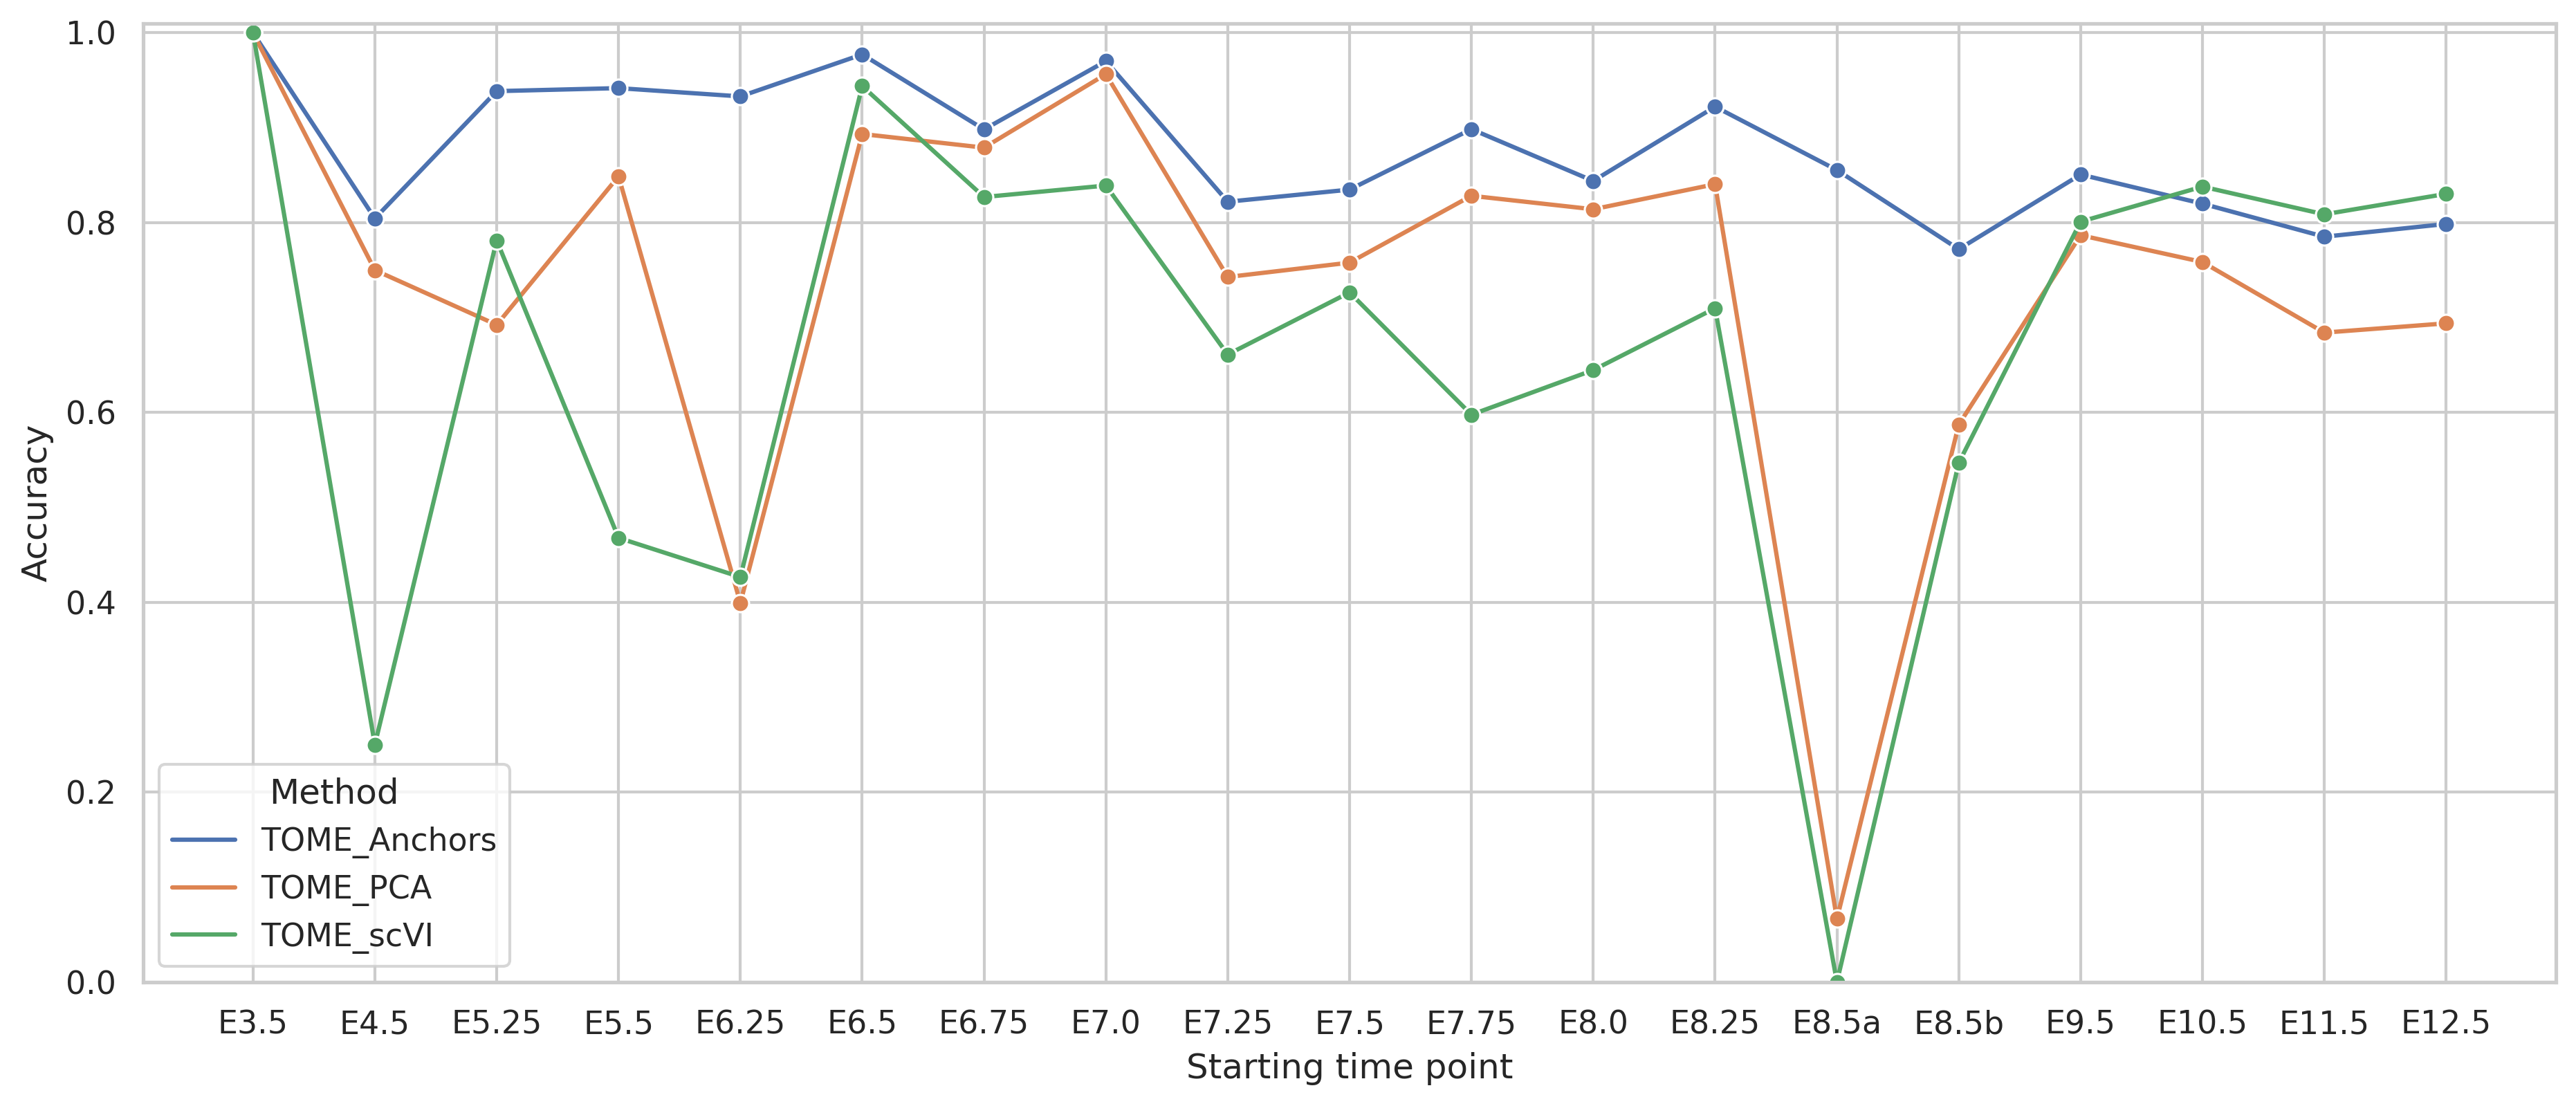

In [34]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,6)})
sns.set_style('whitegrid')
sns.lineplot(data=df[df['Method'].isin(['TOME_Anchors', 'TOME_PCA', 'TOME_scVI'])], x='Starting time point', y='Accuracy', hue='Method', marker='o')
plt.ylim(0,1.01)

In [35]:
df[df['Starting time point']=='E6.25']

,Accuracy,Total_weight,Method,timepair,eps,Starting time point
8,0.954936,5.930504,moscot_Anchors,E6.25_E6.5,0.005,E6.25
9,0.933019,5.942196,TOME_Anchors,E6.25_E6.5,0.005,E6.25
46,0.888851,5.937330,moscot_PCA,E6.25_E6.5,0.005,E6.25
47,0.399397,5.955265,TOME_PCA,E6.25_E6.5,0.005,E6.25
84,0.857150,5.786613,moscot_scVI,E6.25_E6.5,0.005,E6.25
85,0.426647,5.876275,TOME_scVI,E6.25_E6.5,0.005,E6.25


In [36]:
df['Representation']=[a.split('_')[1] for a in df['Method']]
df['Algorithm']=[a.split('_')[0] for a in df['Method']]

# Plot each comparison seperately

In [275]:
# I select a different rep each time and plot then one after another
rep='Anchors'
rep='PCA'
rep='scVI'

In [276]:
## Load all cell-type transitions
CTs={}

for i in range(19):
    ts0=ts[i]
    ts1=ts[i+1]
    
    CTs[ts0]={}
    
    CT0=pd.read_pickle(f'{Path}/moscot_maps/{rep}/CTs/{ts0}_{ts1}_cell_type_transitions.pkl')
    CT1=pd.read_csv(f'{Path}/TOME_maps/{rep}/TOME_map_{ts0}_{ts1}.csv')
    CT1.index=list(CT1['Unnamed: 0'])
    del CT1['Unnamed: 0']
    CT1=CT1.T.copy()
    
    CTs[ts0]['moscot']=CT0
    CTs[ts0]['TOME']=CT1

In [277]:
# Cutoff used to exclude all edges with weight below that
cutoff=0.05

frames=[]

methods=['moscot', 'TOME']

for i in range(19):
    ts0=ts[i]
    ts1=ts[i+1]
    for method in methods:
        CT=CTs[ts0][method]
        sc0, sc1=evaluate_using_curated_transitions(G, CT, cutoff)
        frames.append(pd.DataFrame({'Method':['Curated_transitions: ' +method], 'Starting time point':ts0,
                                    'Accuracy':sc0, 'Weight':sc1, 'Algorithm':method, 'Validation':'curated'}))

for i in range(19):
    ts0=ts[i]
    ts1=ts[i+1]
    for method in methods:
        CT=CTs[ts0][method]
        sc0, sc1=evaluate_using_germ_layers(Lit, CT, cutoff)
        frames.append(pd.DataFrame({'Method':['Germ_layer_transitions: ' +method], 'Starting time point':ts0,
                                    'Accuracy':sc0, 'Weight':sc1, 'Algorithm':method, 'Validation':'germ'}))

df=pd.concat(frames, ignore_index=True)
df

,Method,Starting time point,Accuracy,Weight,Algorithm,Validation
0,Curated_transitions: moscot,E3.5,1.000000,1,moscot,curated
1,Curated_transitions: TOME,E3.5,1.000000,1,TOME,curated
2,Curated_transitions: moscot,E4.5,0.623786,2,moscot,curated
3,Curated_transitions: TOME,E4.5,0.250000,2,TOME,curated
4,Curated_transitions: moscot,E5.25,0.910120,4,moscot,curated
...,...,...,...,...,...,...
71,Germ_layer_transitions: TOME,E10.5,0.993248,49,TOME,germ
72,Germ_layer_transitions: moscot,E11.5,0.986076,55,moscot,germ
73,Germ_layer_transitions: TOME,E11.5,0.992435,55,TOME,germ
74,Germ_layer_transitions: moscot,E12.5,0.989798,51,moscot,germ


In [278]:
moscot_color=np.array([35,107,157])/255
TOME_color=np.array([225,129,45])/255
WOT_color=np.array([127,152,186])/255

Text(0, 0.5, '')

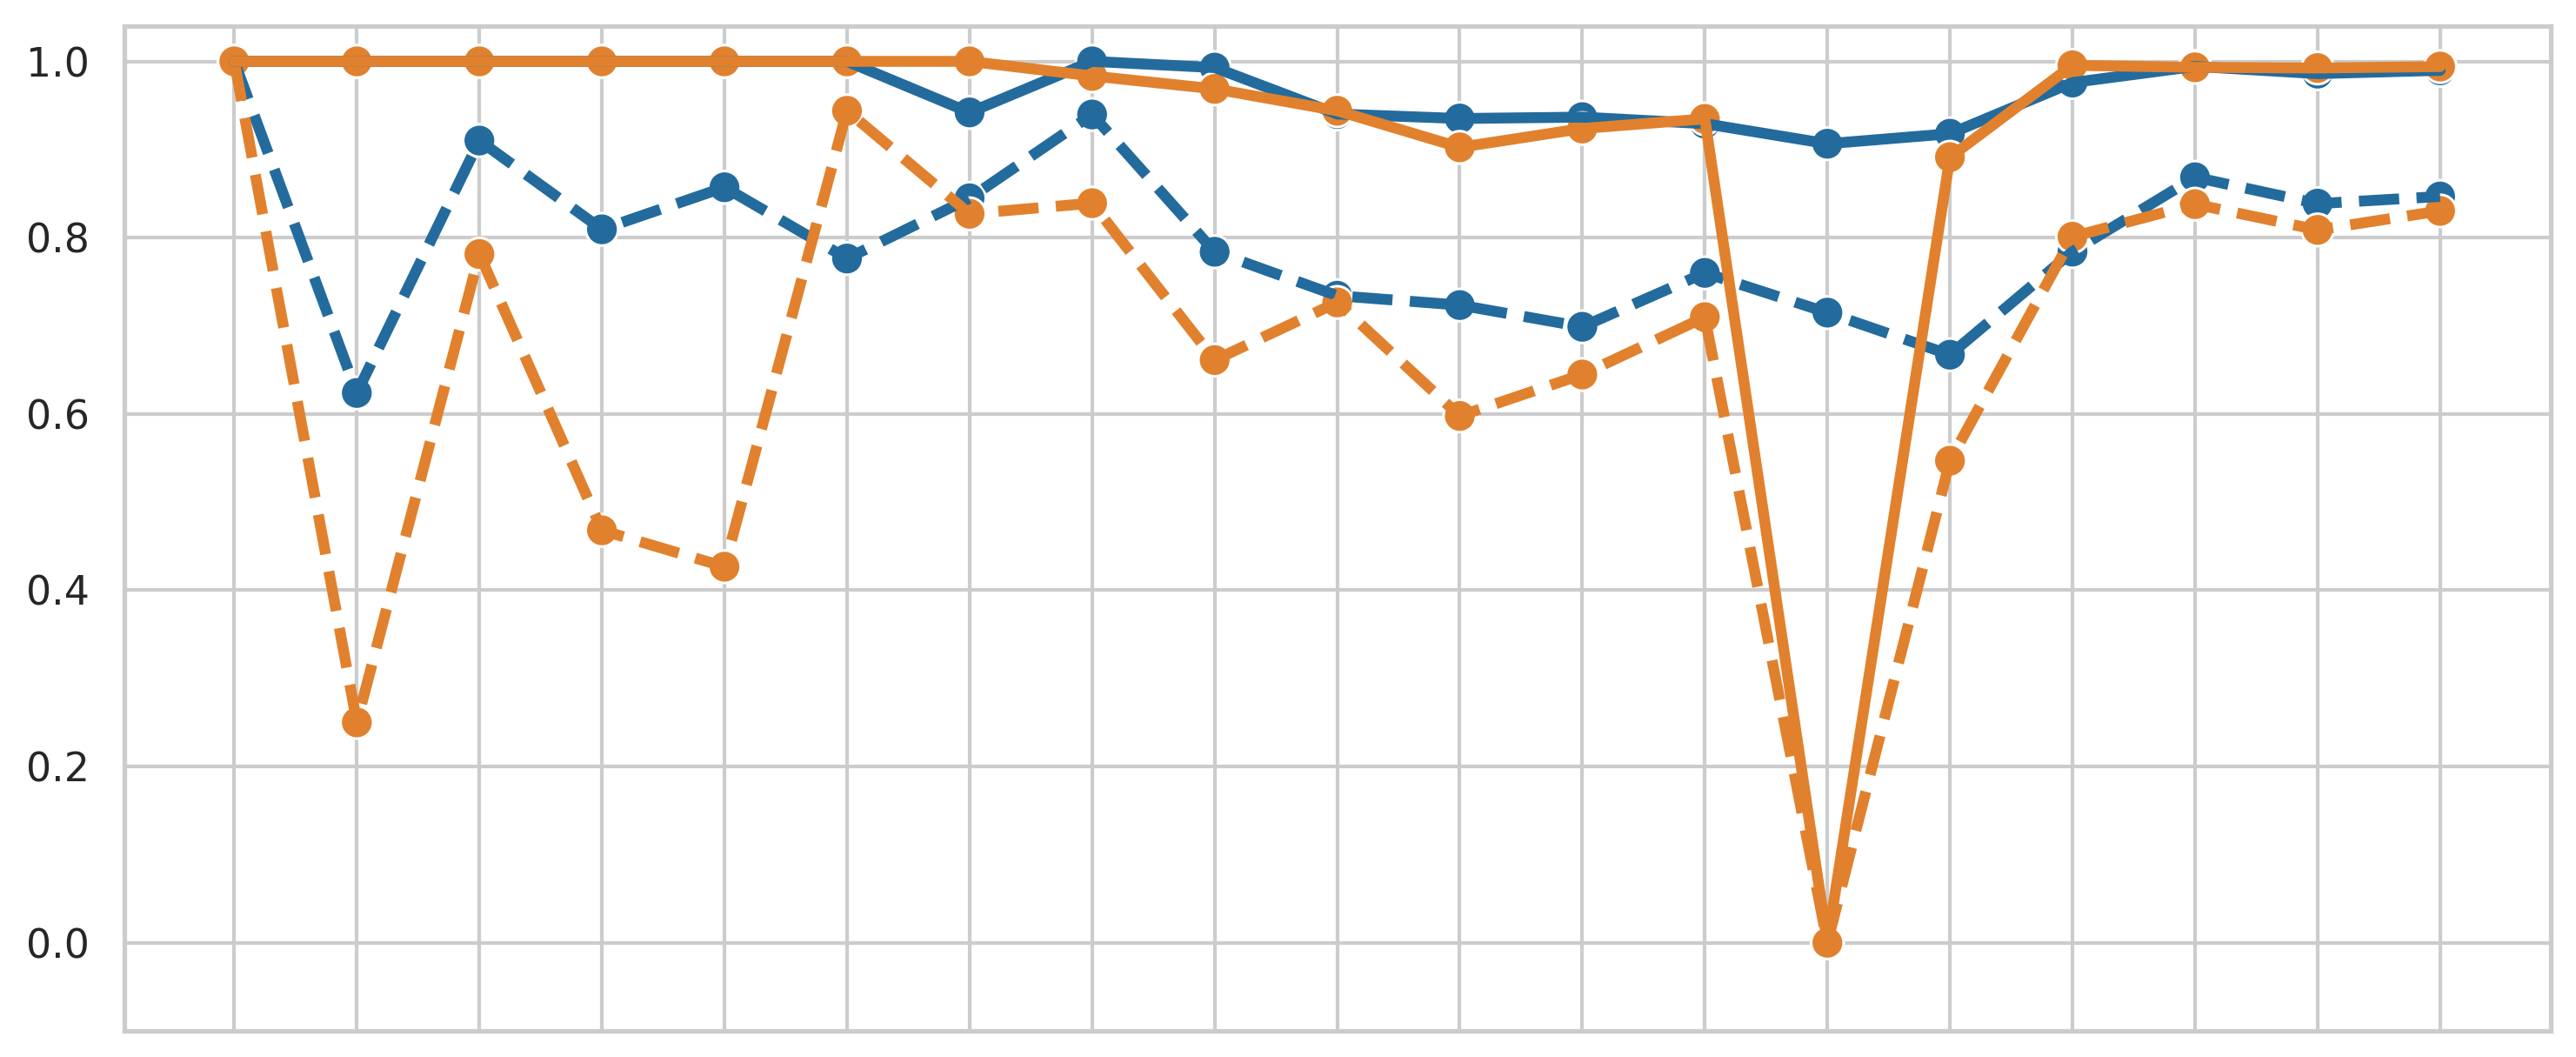

In [279]:
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300
g0=sns.lineplot(data=df[df['Validation']=='curated'], x='Starting time point', y='Accuracy', hue='Method', linewidth=3,
             palette=[moscot_color,TOME_color], linestyle='--')
sns.lineplot(data=df[df['Validation']=='germ'], x='Starting time point', y='Accuracy', hue='Method', linewidth=3,
             palette=[moscot_color,TOME_color], linestyle='-')


sns.scatterplot(data=df, x='Starting time point', y='Accuracy', marker='o', hue='Method', s=80, legend=False,
               palette=[moscot_color,TOME_color,moscot_color,TOME_color])


D_ylims={'Anchors':(0.6,1.02), 'PCA':(-0.05, 1.04), 'scVI':(-0.1,1.04)}
plt.ylim(D_ylims[rep])
if method!='scVI':
    g0.set(xticklabels=[])
    g0.set(xlabel=None)
#g0.set(yticklabels=[])
plt.legend('',frameon=False)
plt.xlabel('')
plt.ylabel('')
#plt.legend(bbox_to_anchor=(0.13, 0.43), loc='upper left', borderaxespad=0)

### For the barplot

In [1]:
D_stage={}

pregast=['E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25']
gast=['E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25']
organ=['E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5']

D_stage=D_stage|{pregast[i]:'Pregastrulation' for i in range(len(pregast))}
D_stage=D_stage|{gast[i]:'Gastrulation' for i in range(len(gast))}
D_stage=D_stage|{organ[i]:'Organogenesis' for i in range(len(organ))}

df['Stage']=[D_stage[a] for a in df['Starting time point']]

NameError: name 'df' is not defined

In [281]:
df00=df[(df['Algorithm']=='moscot')&(df['Validation']=='germ')].copy()
df01=df[(df['Algorithm']=='TOME')&(df['Validation']=='germ')].copy()
df10=df[(df['Algorithm']=='moscot')&(df['Validation']=='curated')].copy()
df11=df[(df['Algorithm']=='TOME')&(df['Validation']=='curated')].copy()

In [282]:
def weighted_accuracy(df):
    df['Weighted_accuracy']=df['Accuracy']*df['Weight']
    df0=df[df['Stage']=='Pregastrulation'].copy()
    df1=df[df['Stage']=='Gastrulation'].copy()
    df2=df[df['Stage']=='Organogenesis'].copy()
    
    sc0=df0['Weighted_accuracy'].sum()/df0['Weight'].sum()
    sc1=df1['Weighted_accuracy'].sum()/df1['Weight'].sum()
    sc2=df2['Weighted_accuracy'].sum()/df2['Weight'].sum()
    
    Df0=pd.DataFrame({'Method':list(df0['Algorithm'].iloc[:3]), 
                      'Stage':['Pregastrulation', 'Gastrulation', 'Organogenesis'],
                      'Accuracy':[sc0, sc1, sc2], 'Validation':list(df0['Validation'].iloc[:3])})
    
    return(Df0)

In [283]:
frames=[]
frames.append(weighted_accuracy(df00))
frames.append(weighted_accuracy(df01))
frames.append(weighted_accuracy(df10))
frames.append(weighted_accuracy(df11))
DF=pd.concat(frames, ignore_index=True)

(0.35, 1.02)

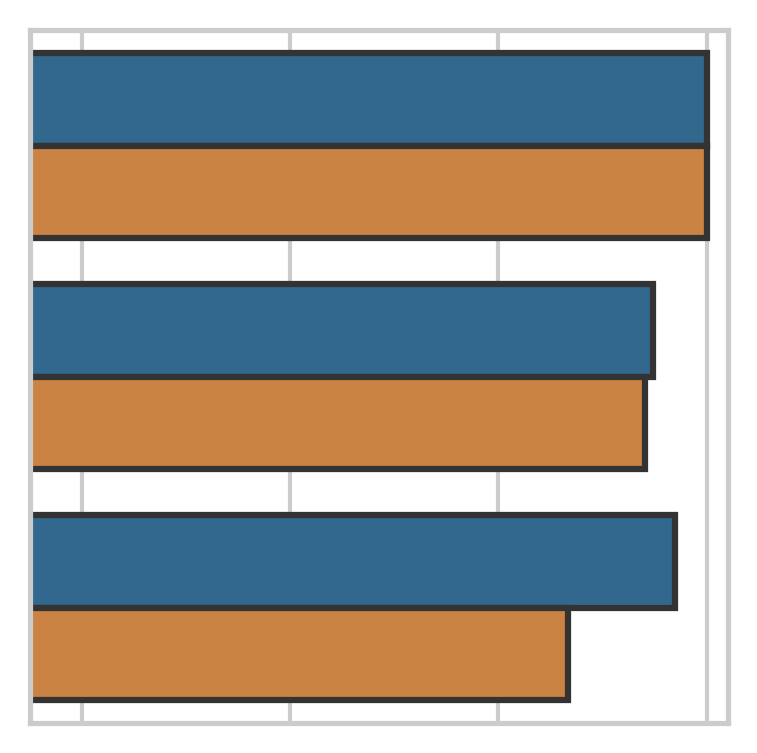

In [284]:
sns.set(rc={'figure.figsize':(3,3)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300


# Germ layer transitions
g0=sns.barplot(data=DF[DF['Validation']=='germ'], x='Accuracy', y="Stage", hue='Method', 
               palette=[moscot_color,TOME_color] , linewidth=1.5, edgecolor='0.2')

plt.xlim(0.35,1.02)

g0.set(xticklabels=[])
g0.set(xlabel=None)
g0.set(ylabel=None)
g0.set(yticklabels=[])
plt.legend('',frameon=False)
plt.xlim()

(0.35, 1.02)

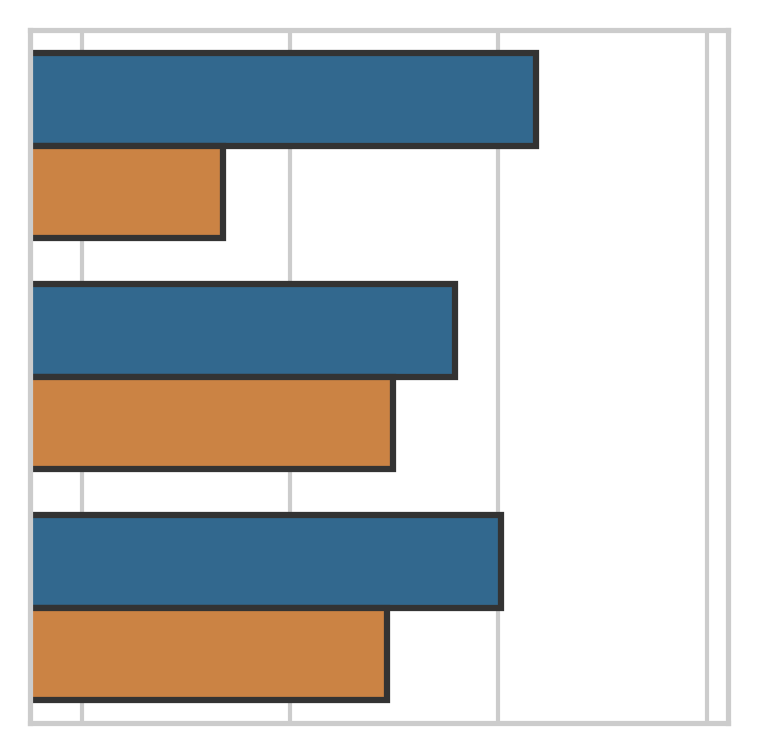

In [285]:
sns.set(rc={'figure.figsize':(3,3)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300


# Curated transitions
g0=sns.barplot(data=DF[DF['Validation']=='curated'], x='Accuracy', y="Stage", hue='Method', 
               palette=[moscot_color,TOME_color] , linewidth=1.5, edgecolor='0.2')

plt.xlim(0.35,1.02)

g0.set(xticklabels=[])
g0.set(xlabel=None)
g0.set(ylabel=None)
g0.set(yticklabels=[])
plt.legend('',frameon=False)
plt.xlim()

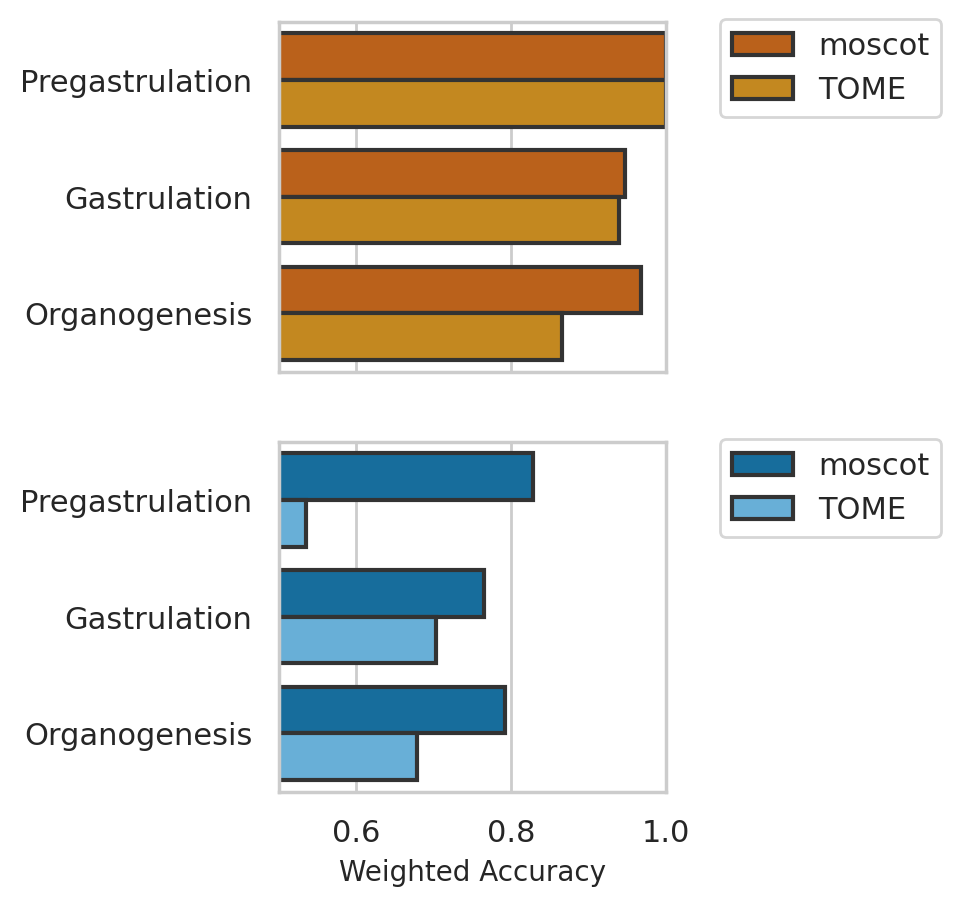

In [159]:
xlim=0.5

fig, axs = plt.subplots(2, 1, figsize=(2.5, 5), dpi=200)
# Germ layer transitions
g0=sns.barplot(ax=axs[0], data=DF[DF['Validation']=='germ'], x='Accuracy', y="Stage", hue='Method', 
               palette=[w0,w1] , linewidth=1.5, edgecolor='0.2')

g0.set(xticklabels=[])
g0.set(xlabel=None)
g0.set(ylabel=None)  

# Curated transitions

g1=sns.barplot(ax=axs[1], data=DF[DF['Validation']=='curated'], x='Accuracy', y="Stage", hue='Method',
               palette=[m0,m1], linewidth=1.5, edgecolor='0.2')
g1.set(ylabel=None)
plt.xlabel('Weighted Accuracy', fontsize=10)
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
axs[1].legend(bbox_to_anchor=(1.1, 1.05))
axs[0].set_xlim(xlim, 1)
axs[1].set_xlim(xlim, 1)

plt.show()

# The cell-type transiton heatmap for E8.5a-E8.5b

In [299]:
D_col={}
D_col['Allantois']='aliceblue'
D_col['Amniochorionic mesoderm A']='aqua'
D_col['Amniochorionic mesoderm B']='aquamarine'
D_col['Anterior floor plate']='cornflowerblue'
D_col['Blood progenitors']='royalblue'
D_col['Definitive endoderm']='darkblue'
D_col['Endothelium']='darkslateblue'
D_col['Extraembryonic mesoderm']='darkmagenta'
D_col['Extraembryonic visceral endoderm']='blueviolet'
D_col['First heart field']='fuchsia'
D_col['Forebrain/midbrain']='deeppink'
D_col['Fusing epithelium']='hotpink'
D_col['Gut']='indianred'
D_col['Hematoendothelial progenitors']='lightcoral'
D_col['Hindbrain']='orangered'
D_col['Intermediate mesoderm']='crimson'
D_col['Neural crest']='red'
D_col['Neuromesodermal progenitors']='darkred'
D_col['Notochord']='maroon'
D_col['Paraxial mesoderm A']='sienna'
D_col['Paraxial mesoderm B']='brown'
D_col['Placodal area']='chocolate'
D_col['Posterior floor plate']='darkgoldenrod'
D_col['Pre-epidermal keratinocytes']='darkolivegreen'
D_col['Primitive erythroid cells']='olive'
D_col['Primordial germ cells']='olivedrab'
D_col['Second heart field']='forestgreen'
D_col['Somatic mesoderm']='limegreen'
D_col['Spinal cord']='mediumaquamarine'
D_col['Splanchnic mesoderm']='palegreen'

In [300]:
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

In [301]:
CT0=CTs['E8.5a']['moscot']
CT1=CTs['E8.5a']['TOME']

In [302]:
ct0s=sorted(CT0.index)
ct1s=sorted(CT0.columns)

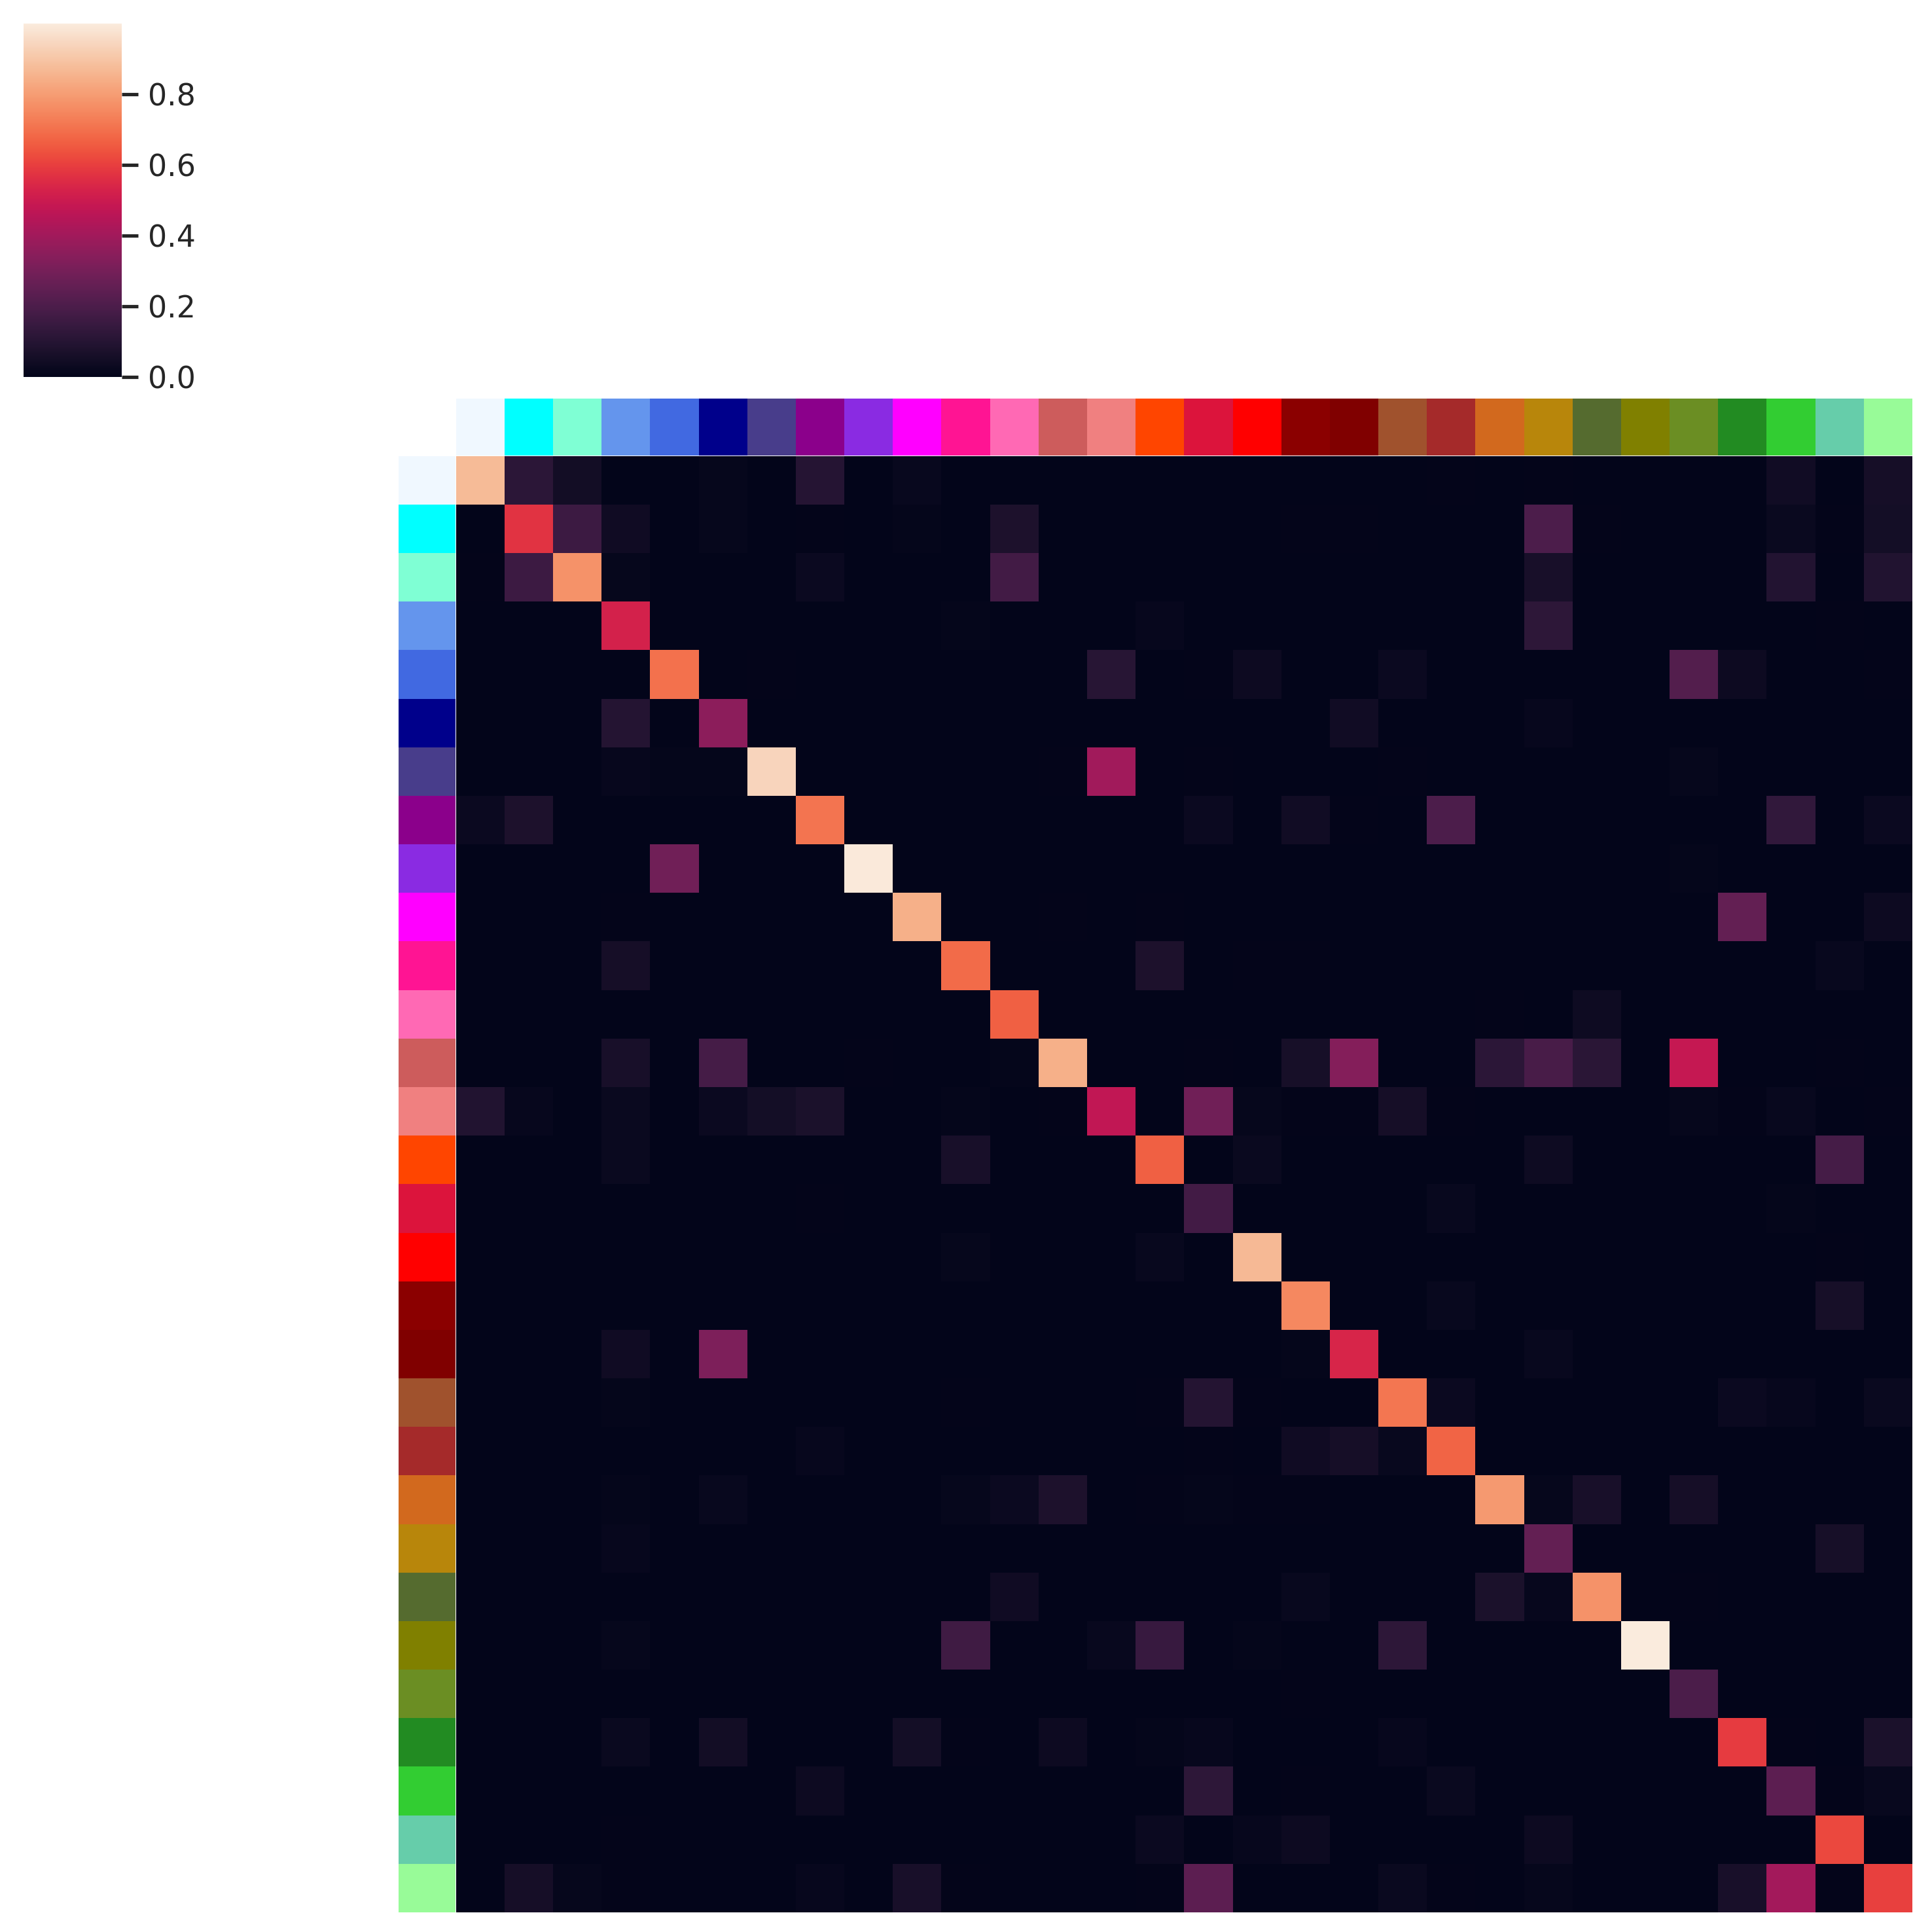

In [314]:
g=sns.clustermap(CT0.loc[ct0s][ct1s], row_colors=[D_col[a.split(':')[1]] for a in ct0s], 
               col_colors=[D_col[a.split(':')[1]] for a in ct1s],
               row_cluster=False, col_cluster=False,
                yticklabels=False,xticklabels=False)

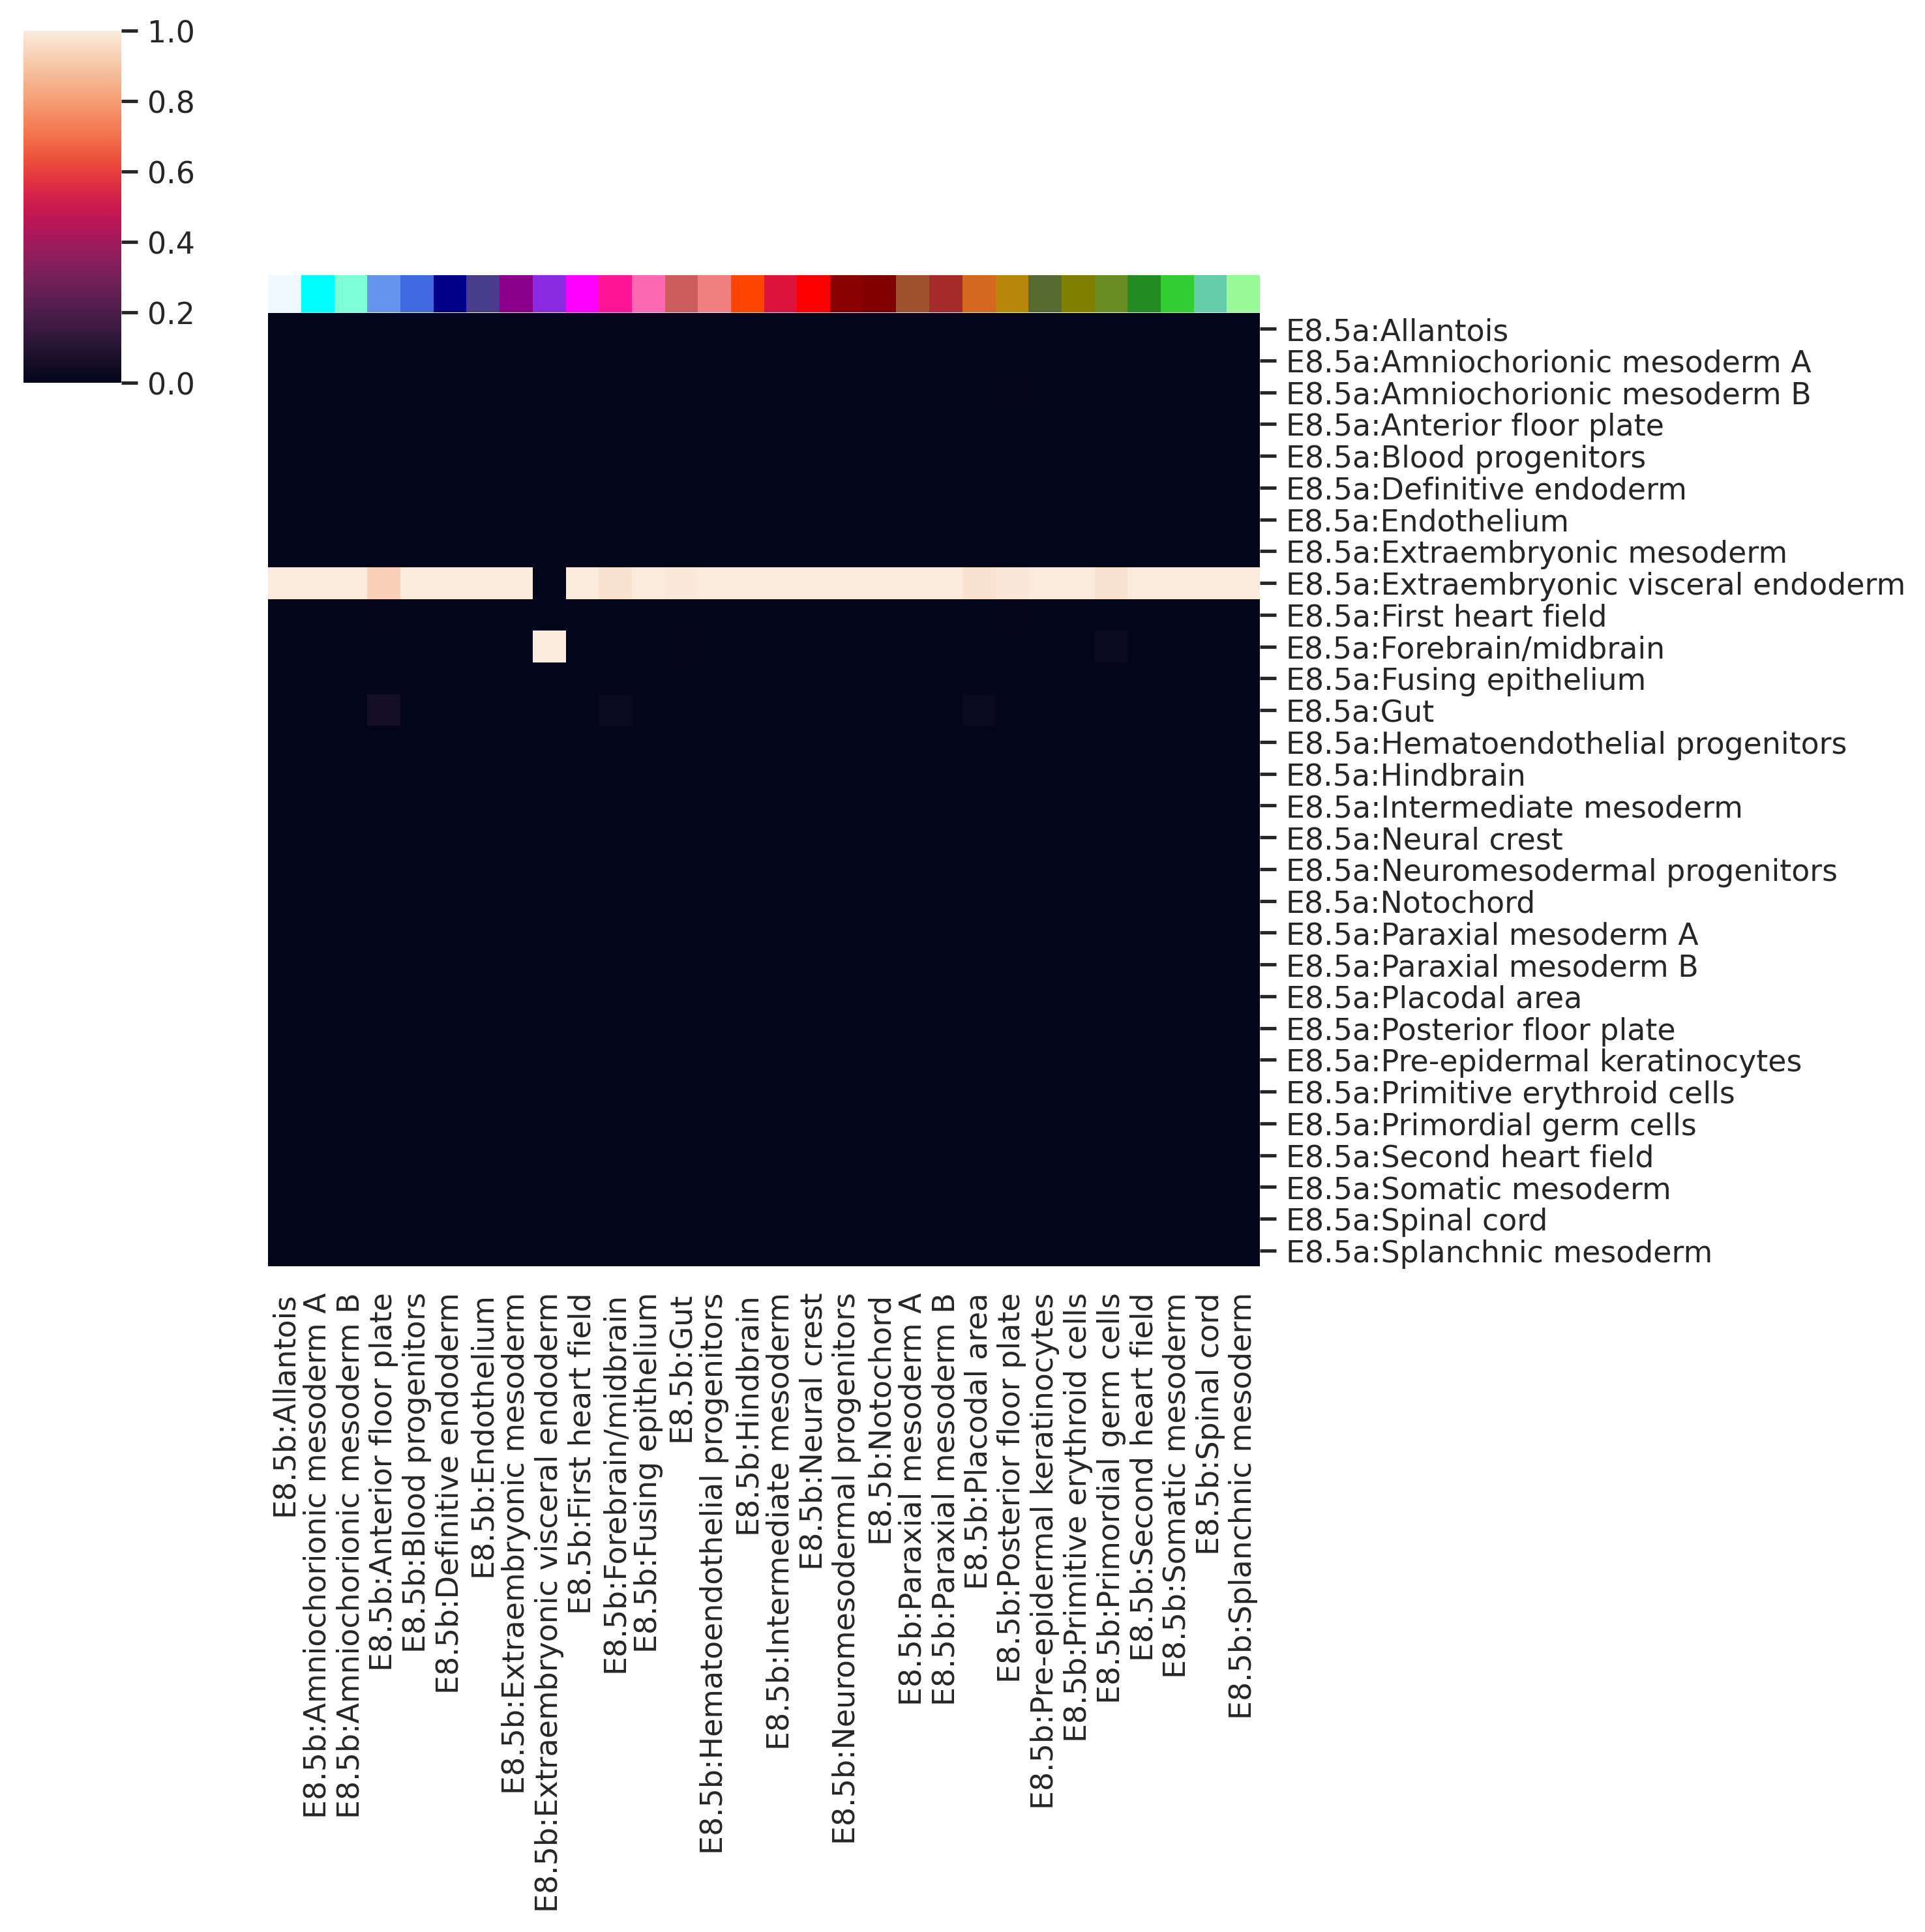

In [317]:
g=sns.clustermap(CT1.loc[ct0s][ct1s], 
                 #row_colors=[D_col[a.split(':')[1]] for a in ct0s], 
               col_colors=[D_col[a.split(':')[1]] for a in ct1s],
               row_cluster=False, col_cluster=False,
                #yticklabels=False,xticklabels=False
                )